# 🚀 Obesity Detection Project
Collaborative Google Colab Template

## 👥 Team Members:
- Member 1: MC184D5X0482 - Rensa Ayu Lestari - Universitas Andalas
- Member 2: MC827D5X0900 - Susi Angelina
- Member 3: MC604D5Y0876 - Muhamad Tegar Wijaya

## 📌 Objective:
Build a machine learning model to detect obesity levels based on user input data.

### 1. Import Library
Kita menggunakan library Python berikut untuk membangun model klasifikasi obesitas berbasis TensorFlow:

-pandas, numpy: Untuk manipulasi dan analisis data.

-matplotlib, seaborn: Untuk visualisasi distribusi data, outlier, dan hasil evaluasi model.

-sklearn: Digunakan untuk preprocessing (Label Encoding, StandardScaler), dan membagi dataset (train/test split).

-tensorflow.keras: Digunakan untuk membangun, melatih, dan mengevaluasi model deep learning secara fleksibel.


In [2]:
# === 1. IMPORT LIBRARY ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


### 2. Load Dataset
Dataset dimuat dari file CSV.

---

In [3]:
# 📁 Load Dataset
data = pd.read_csv('/content/obesity_data.csv')

### 3. Data Preprocessing
- **Disini kita menampilakn ini data**
- **Melakukan Check Outlier**
- **Missing Values**: Data kosong dibuang (atau bisa juga diimputasi sesuai kasus).
- **Encoding**: Kolom kategori seperti Gender, Label obesiti, dll diubah ke angka menggunakan Label Encoding.
- ** Dan melakukan endcode serta scaling**


---

In [4]:
# Stukture dataset
print(data.head())
print(data.info())
print(data.describe())

   Age  Gender      Height     Weight        BMI  PhysicalActivityLevel  \
0   56    Male  173.575262  71.982051  23.891783                      4   
1   69    Male  164.127306  89.959256  33.395209                      2   
2   46  Female  168.072202  72.930629  25.817737                      4   
3   32    Male  168.459633  84.886912  29.912247                      3   
4   60    Male  183.568568  69.038945  20.487903                      3   

  ObesityCategory  
0   Normal weight  
1           Obese  
2      Overweight  
3      Overweight  
4   Normal weight  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI    

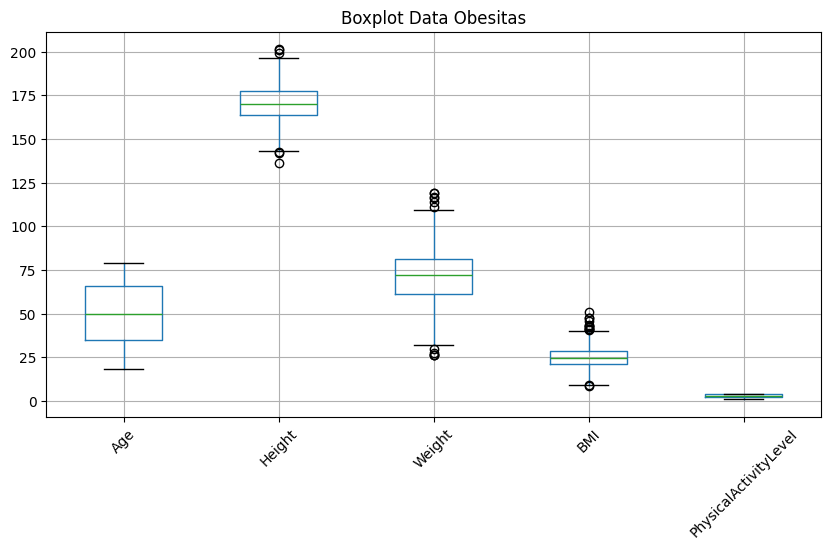

In [5]:
# Cek Outlier
plt.figure(figsize=(10, 5))
data.boxplot()
plt.title("Boxplot Data Obesitas")
plt.xticks(rotation=45)
plt.show()

In [6]:
# 🧹 Data Preprocessing
# Contoh: Label Encoding, Missing Values, dll


# Menghapus baris yang memiliki nilai kosong
data.dropna(inplace=True)

#Melaukan Encode
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['ObesityCategory'] = label_encoder.fit_transform(data['ObesityCategory'])  # Target juga di-encode


# 3. Scaling
X = data.drop('ObesityCategory', axis=1)
y = data['ObesityCategory']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. One-hot encode target
y_encoded = to_categorical(y)


### 4. Split Dataset
Dataset dibagi menjadi:

Training Set (80%): Digunakan untuk melatih model.

Testing Set (20%): Digunakan untuk mengevaluasi kinerja model setelah proses pelatihan.

Pada kode ini, kita menggunakan 80% data untuk pelatihan (X_train, y_train) dan 20% untuk pengujian (X_test, y_test). Pembagian ini dilakukan menggunakan fungsi train_test_split dari sklearn.model_selection, dengan parameter test_size=0.2 untuk menentukan proporsi data yang digunakan untuk pengujian. random_state=123 digunakan untuk memastikan pembagian yang konsisten setiap kali kode dijalankan.


In [7]:
# 📊 Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=123)


### 5. Model Machine Learning
TensorFlow **Keras Sequential Model** (Artificial Neural Network (ANN).) digunakan karena:

- Fleksibel untuk membangun dan menyesuaikan arsitektur jaringan neural (jumlah layer, neuron, fungsi aktivasi, dsb).

- Mampu menangkap hubungan non-linear antar fitur.

- Cocok untuk dataset tabular jika didukung preprocessing yang baik (seperti normalisasi dan encoding).

- Dapat dioptimasi dengan berbagai teknik seperti Early Stopping, Regularization, dan Dropout.

- Terintegrasi dengan ekosistem AI modern dan mendukung inference (prediksi) secara efisien.


---

In [8]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')  # Multi-class output
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Train Model
**Dibagian train model ini** kita akan Melatih model dengan data training selama 50 epoch. Menggunakan batch size 16 dan 20% data untuk validasi selama pelatihan.

In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

### 6. Evaluasi Model
Kita gunakan metrik:
- **Confusion Matrix**
- **Precision, Recall, F1-Score**
- **Accuracy** (jika data seimbang)

---

In [10]:
# 📈 Evaluation on Validation Set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print("\n📊 Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.89      1.00      0.94        41
           2       0.97      0.91      0.94        69
           3       0.95      1.00      0.98        21

    accuracy                           0.95       200
   macro avg       0.95      0.97      0.96       200
weighted avg       0.96      0.95      0.96       200



### 7. Validation Statistik (opsional lanjutan)

Untuk melihat stabilitas model pada data berbeda.

# Plot Validation Loss
- **Dikode ini kita melakukan atau menampilkan statistik dari Validation loss**
- **Diambil dari Training validation dan epochs yang dilakukan**

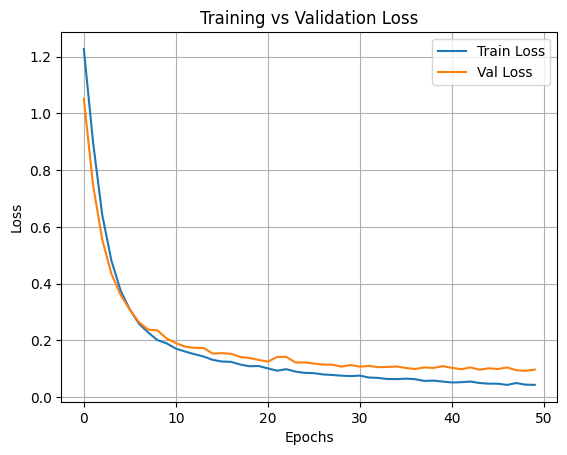

In [16]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


# Plot Validation Accuracy
- **Dikode ini kita melakukan atau menampilkan statistik dari Validation accuracy**
- **Menampilkan plot accuracy training**

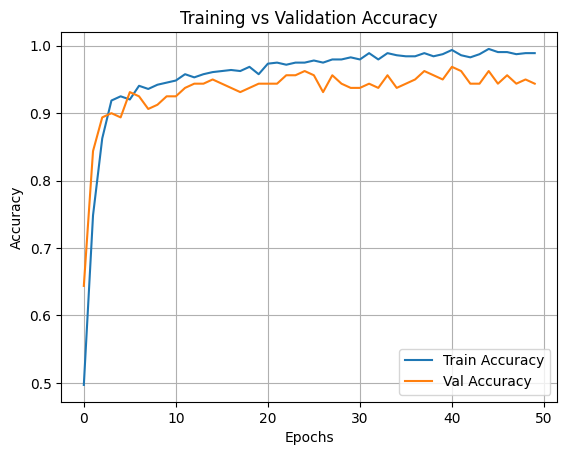


🎯 Test Accuracy: 0.95


In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n🎯 Test Accuracy: {acc:.2f}")


In [13]:

# 🤖 Manual Inference Input (dengan perhitungan BMI otomatis)
print("\n=== PREDIKSI KATEGORI OBESITAS (INPUT MANUAL) ===")
age = int(input("Masukkan Umur: "))
gender = input("Masukkan Gender (Male/Female): ").strip().lower()
height_cm = float(input("Masukkan Tinggi (cm): "))
weight_kg = float(input("Masukkan Berat (kg): "))
activity = int(input("Masukkan Physical Activity Level (1-3): "))

# Hitung BMI otomatis\
height_m = height_cm / 100
bmi = weight_kg / (height_m ** 2)

print(f"BMI yang dihitung: {bmi:.2f}")

# Encode gender
gender_num = 1 if gender == 'male' else 0

# Buat array dan scaling
input_data = scaler.transform([[age, gender_num, height_cm, weight_kg, bmi, activity]])
prediction = model.predict(input_data)
predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])

print(f"\nKategori Obesitas yang Diprediksi: {predicted_class[0]}")


=== PREDIKSI KATEGORI OBESITAS (INPUT MANUAL) ===
Masukkan Umur: 21
Masukkan Gender (Male/Female): male
Masukkan Tinggi (cm): 170
Masukkan Berat (kg): 55
Masukkan Physical Activity Level (1-3): 1
BMI yang dihitung: 19.03
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Kategori Obesitas yang Diprediksi: Normal weight


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
model.save('model_obesitas.keras')  # format baru, direkomendasikan


In [ ]:
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
joblib.dump(label_encoder, "label_encoder.pkl")


['label_encoder.pkl']